This notebook loads the VAEs trained by each method, and displays their optimization path. This reproduces Figure 6 in our paper 

https://arxiv.org/pdf/1810.04777.pdf

To obtain the models displayed in this notebook, see the `../scripts/` folder which contain the scripts used to generate these models. 

Since the optimization algorithms are stochastic, for each method, we ran ten trials from the same initialization, but with a different seed, and averaged their paths. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# function to load in the losses and the timing measurements
def get_test_losses(method, trial_vec,
                    file_loc = '../mnist_vae_results', 
                   print_timing = True): 
    
    plt.plot()
    
    i = 0
    
    n_trials = len(trial_vec)
    train_accuracy_vec = np.zeros(n_trials)
    test_accuracy_vec = np.zeros(n_trials)
    
    for trial in trial_vec:
        test_losses = np.load(file_loc + '/moving_mnist_vae_' + method +'_trial' + trial + '_test_losses.npy')
        test_timing = np.load(file_loc + '/moving_mnist_vae_' + method +'_trial' + trial + '_test_timing.npy')
        
        batch_timings = np.load(file_loc + '/moving_mnist_vae_' + method +'_trial' +\
                                          trial + '_batch_timing.npy')
        if i == 0: 
            test_losses_array = np.zeros((n_trials, len(test_losses)))
            test_timing_array = np.zeros((n_trials, len(test_losses)))
            
            batch_timing_array = np.zeros((n_trials, len(batch_timings)))

        test_losses_array[i, :] = test_losses
        test_timing_array[i, :] = test_timing
        
        if print_timing: 
            batch_timing_array[i, :] = batch_timings
                
        i += 1
        plt.plot(test_losses)
    
    if print_timing: 
        print('avg sec per epoch: mean = {}, sd = {}'.format(np.mean(batch_timing_array), 
                                                             np.std(batch_timing_array)))
    
    return test_losses_array, test_timing_array

# NVIL

avg sec per epoch: mean = 9.506151620546976, sd = 1.4146833405829096


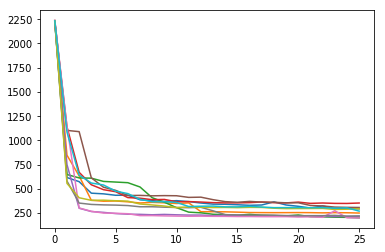

In [3]:
trial_vec = [str(x) for x in range(1, 10 + 1)]
nvil_test_losses, nvil_batch_timing = get_test_losses('nvil', trial_vec)

# REBAR

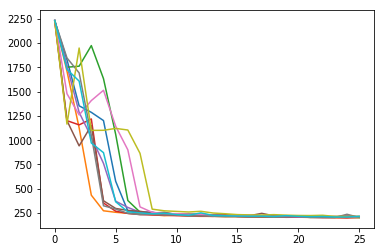

In [4]:
trial_vec = [str(x) for x in range(1, 10 + 1)]

# somehow the timing plot got messed up
rebar_test_losses, rebar_batch_timing = get_test_losses('rebar', trial_vec, print_timing = False)

# Our Rao-Blackwellization method

avg sec per epoch: mean = 15.342851332589692, sd = 2.2620084850614477


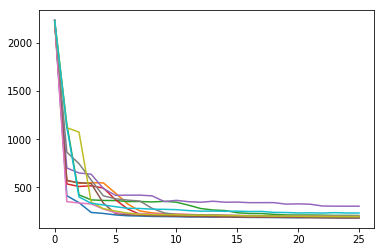

In [5]:
trial_vec = [str(x) for x in range(1, 10 + 1)]

topk_test_losses, topk_batch_timing = get_test_losses('reinforce_double_bs_topk5', trial_vec)

# REINFORCE

avg sec per epoch: mean = 8.991423829864052, sd = 1.2725775985823475


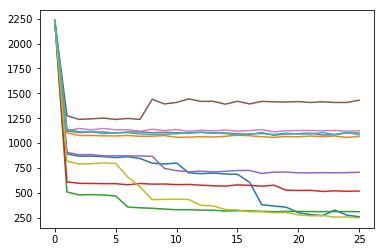

In [6]:
reinforce_test_losses, reinforce_batch_timing = get_test_losses('reinforce_double_bs', trial_vec)

# Gumbel-softmax

avg sec per epoch: mean = 8.742515292354659, sd = 1.2373925541792312


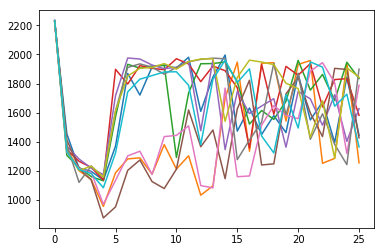

In [7]:
trial_vec = [str(x) for x in range(1, 11)]
gumbel_test_losses, gumbel_batch_timing = get_test_losses('gumbel', file_loc='../mnist_vae_results/', 
                                                          trial_vec = trial_vec)

# RELAX

avg sec per epoch: mean = 11.056741728034673, sd = 1.5656310160189302


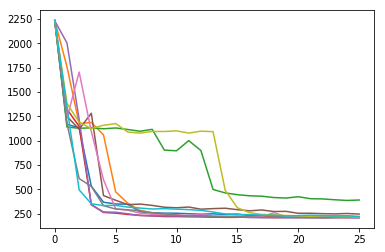

In [8]:
relax_test_losses, relax_batch_timing = get_test_losses('relax', 
                                                       trial_vec = trial_vec)

In [9]:
n_epoch = topk_test_losses.shape[1]

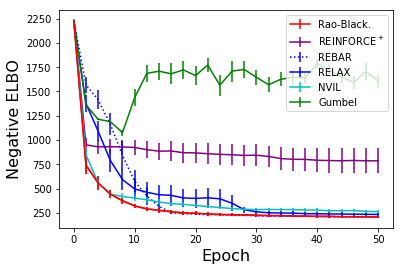

In [11]:
plt.errorbar(np.arange(n_epoch) * 2, 
            np.mean(topk_test_losses, axis = 0), 
            yerr= np.std(topk_test_losses, axis = 0) / np.sqrt(10), 
            label = 'Rao-Black.', 
            color = 'r')

plt.errorbar(np.arange(n_epoch) * 2, 
            np.mean(reinforce_test_losses, axis = 0), 
            yerr= np.std(reinforce_test_losses, axis = 0) / np.sqrt(10), 
            label = 'REINFORCE$^+$', 
            color = 'purple')


plt.errorbar(np.arange(n_epoch) * 2, 
            np.mean(rebar_test_losses, axis = 0), 
            yerr= np.std(rebar_test_losses, axis = 0) / np.sqrt(10), 
            label = 'REBAR', 
             linestyle=':',
            color = 'b')

plt.errorbar(np.arange(n_epoch) * 2, 
            np.mean(relax_test_losses, axis = 0), 
            yerr= np.std(relax_test_losses, axis = 0) / np.sqrt(10), 
            label = 'RELAX', 
            color = 'b')


plt.errorbar(np.arange(n_epoch) * 2, 
            np.mean(nvil_test_losses, axis = 0), 
            yerr= np.std(nvil_test_losses, axis = 0) / np.sqrt(10), 
            label = 'NVIL', 
            color = 'c')

plt.errorbar(np.arange(n_epoch) * 2, 
            np.mean(gumbel_test_losses, axis = 0), 
            yerr= np.std(gumbel_test_losses, axis = 0) / np.sqrt(gumbel_test_losses.shape[0]), 
            label = 'Gumbel', 
            color = 'g')

plt.errorbar(np.arange(n_epoch) * 2, 
            np.mean(topk_test_losses, axis = 0), 
            yerr= np.std(topk_test_losses, axis = 0) / np.sqrt(10), 
            color = 'r')

plt.legend(loc = 1)

from matplotlib.ticker import StrMethodFormatter
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) #  decimal places


plt.xlabel('Epoch', fontsize = 16)
plt.ylabel('Negative ELBO', fontsize = 16)

plt.savefig('../../icml_figures/moving_mnist_elbo_plot.png')